In [2]:
import numpy as np
import pandas as pd

In [3]:
original = pd.read_pickle('Data/cmktcap_data_final.pickle')
colnums = original.coin_id.unique()

In [4]:
original

,coin_id,open,high,low,close,vol,mktcap,timehigh,timelow
date,,,,,,,,,
2013-04-28,1,135.300003,135.979996,132.100006,134.210007,0.00,1.488567e+09,2013-04-28T18:50:02.000Z,2013-04-28T20:15:02.000Z
2013-04-28,5,0.386958,0.404659,0.376287,0.386525,0.00,7.250189e+06,2013-04-28T19:40:02.000Z,2013-04-28T23:30:03.000Z
2013-04-28,3,1.102690,1.124330,1.077220,1.107230,0.00,5.995983e+06,2013-04-28T23:15:02.000Z,2013-04-28T19:55:02.000Z
2013-04-28,2,4.299830,4.400280,4.184650,4.348400,0.00,7.463694e+07,2013-04-28T23:30:02.000Z,2013-04-28T20:30:02.000Z
2013-04-28,4,0.650793,0.654064,0.634409,0.646892,0.00,1.503099e+06,2013-04-28T18:50:02.000Z,2013-04-28T22:25:03.000Z
...,...,...,...,...,...,...,...,...,...
2023-04-16,10202,0.013686,0.013883,0.013458,0.013619,19560.89,0.000000e+00,2023-04-16T00:45:00.000Z,2023-04-16T10:18:00.000Z
2023-04-16,10207,0.000023,0.000023,0.000023,0.000023,1378.42,0.000000e+00,2023-04-16T19:02:00.000Z,2023-04-16T11:43:00.000Z
2023-04-16,10208,0.000085,0.000089,0.000085,0.000089,25.52,0.000000e+00,2023-04-16T23:07:00.000Z,2023-04-16T00:01:00.000Z


In [10]:
len(colnums)

10487

In [5]:
data = pd.read_pickle('Data/cmktcap_snapshot_raw.pickle')

tc_mktcap = pd.pivot_table(data=data,
                           index='date',
                           columns='id',
                           values='t*c')

In [26]:
r = []
for i in list(map(int, colnums)):
    if i in tc_mktcap.columns:
        r.append(i)

len(r)

10288

In [53]:
tc_mktcap = tc_mktcap.loc[:,r]
tc_mktcap.index.name = None
tc_mktcap.index = pd.to_datetime(tc_mktcap.index)

tc_mktcap.to_pickle('Data/tot_supply_mktcap.pickle')

차이 분석

In [10]:
sc_mktcap = pd.pivot_table(data = original,
                           values='mktcap',
                           index=original.index,
                           columns='coin_id').loc['2013-12-28':]

<AxesSubplot:xlabel='date'>

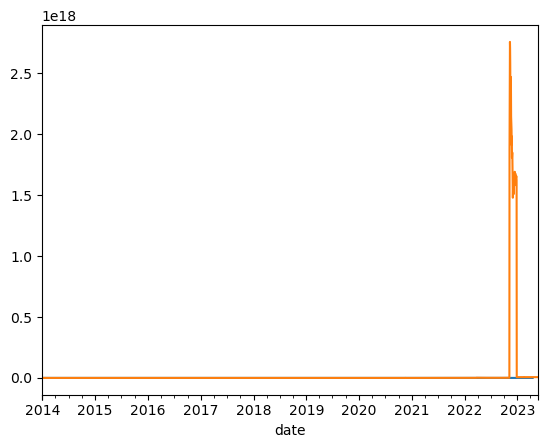

In [52]:
sc_mktcap.sum(1).plot()
tc_mktcap.sum(1).plot()

<AxesSubplot:>

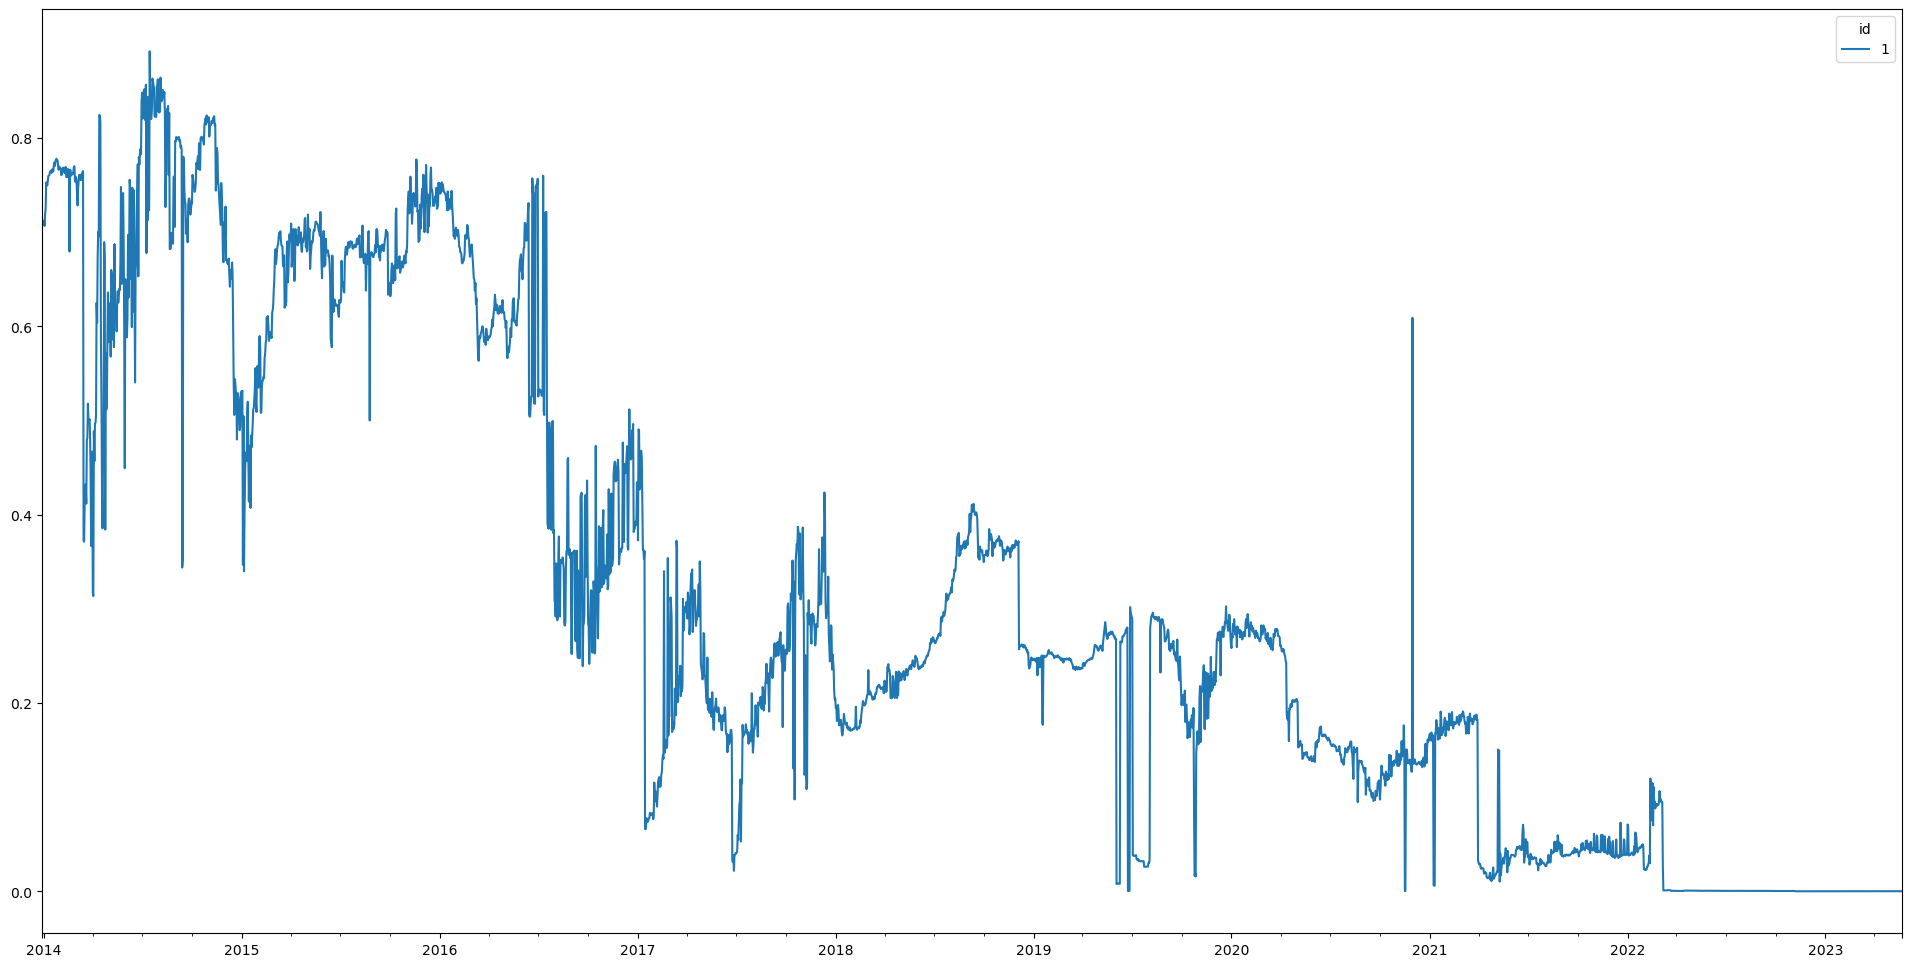

In [58]:
weight = tc_mktcap.apply(lambda x: x/np.nansum(x), axis=1)
weight[[1]].plot(figsize=(24,12))